# Laboratório #6

### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu trabalho seja salvo.
2. Quando você terminar os exercícios do laboratório, vá ao menu do Colab ou Jupyter e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb.
    * Este deve ser o arquivo que você irá entregar.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
4. Não se esqueça de colocar seu **nome** e **matrícula** na célula de texto abaixo.

**Nome**:

**Matrícula**:

## Exercícios

#### 1)  Neste exercício, você irá utilizar a classe `Perceptron` da biblioteca SciKit-Learn para implementar a operação lógica AND com dados de entrada ruidosos. Esta operação pode ser vista como uma tarefa de classificação.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de duas classes.

**DICAS**

+ Note que na célula abaixo, o conjunto de dados já é dividido em conjuntos de treinamento e validação.

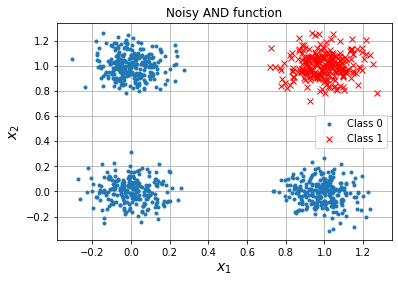

In [ ]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score

# Reset PN sequence generator.
seed = 0
np.random.seed(seed)

# Number of examples.
N = 1000

# Create attributes.
x1 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)
x2 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)

# Target function: x1 AND x2.
y = x1 & x2

# Add noise to the attributes.
x1 = x1 + 0.1*np.random.randn(N,1)
x2 = x2 + 0.1*np.random.randn(N,1)

# Concatenate attribute vectors.
X = np.c_[x1, x2]

# Split array into random train and validation subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Plot the two classes.
idx0 = np.argwhere(y.ravel() == 0)
idx1 = np.argwhere(y.ravel() == 1)
plt.plot(X[idx0.ravel(),0], X[idx0.ravel(),1], '.', label='Class 0')
plt.plot(X[idx1.ravel(),0], X[idx1.ravel(),1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Noisy AND function')
plt.legend()
plt.grid()
plt.show()

2. Observando a figura acima, responda:

+ As duas classes são linearmente separáveis? (**Justifique sua resposta.**)

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

3. Treine um perceptron usando uma instância da classe `Perceptron` da biblioteca SciKit-Learn com o **conjunto de treinamento** criado no item 1 deste exercício.

**DICAS**

+ Por padrão, o parâmetro `fit_intercept` da classe `Perceptron` é igual a `True`. Portanto, não é necessário concatenar o vetor com valores iguais a 1 (atributo de bias) às matrizes de atributos de treinamento e validação. Desta forma, as matrizes de atributos de treinamento e validação seguirão o formato da equação do plano: $g(\textbf{x}) = \hat{a}_0 + \hat{a}_1x_1 + \hat{a}_2x_2$.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.

4. Calcule e imprima a acurácia do perpectron usando o **conjunto de validação** criado no item 1 deste exercício.

**DICAS**
+ Use a função `accuracy_score` da biblioteca SciKit-Learn para calcular a acurácia do perceptron.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.

5. Crie uma figura mostrando as regiões de decisão do perceptron.

**DICA**

+ A matriz de atributos criada para plotar as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.

6. Plote a matriz de confusão do perceptron para os exemplos do **conjunto de validação**.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.

#### 2)  Neste exercício, você irá combinar alguns perceptrons para realizar a operação lógica XNOR com dados de entrada ruidosos. Esta operação pode ser vista como uma tarefa de classificação.

+ A função lógica XNOR (Exclusive NOR), ou seja, o complemento da lógica XOR, é dada pela tabela abaixo.

| Input |   |  Output  |
|:-----:|:-:|:--------:|
|   A   | B | A XNOR B |
|   0   | 0 |     1    |
|   0   | 1 |     0    |
|   1   | 0 |     0    |
|   1   | 1 |     1    |

+ A função lógica XNOR pode ser reescrita em função de operações mais simples assim como fizemos com a função lógica XOR. A função lógica XNOR pode ser reescrita da seguinte forma:

```python
XNOR = ~(A ^ B) = (A | ~B) & (~A | B)
```

+ Observando a expressão acima, verificamos que existem três operações principais: duas operações lógicas OR e uma AND.
    + O complemento só altera a localização da função discriminante.


+ Sabemos que essas duas operações lógicas podem ser implementadas por classificadores lineares, pois os dados são **linearmente separáveis**.


+ Portanto, podemos treinar três perceptrons diferentes para realizar cada uma destas operações e ao final combinar seus resultados para se obter a classificação do lógica XNOR.


+ A figura abaixo mostra a combinação necessária dos três perceptrons para que a a lógica XNOR seja implementada.

<img src="https://github.com/zz4fap/t320_aprendizado_de_maquina/blob/main/figures/xnor_perceptrons.png?raw=1" width="800px">

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos das duas classes.

**DICAS**

+ Notem que na célula abaixo os seguintes dados já são gerados:
   * Matriz de atributos $\textbf{X}$, a qual será utilizada como entrada dos dois primeiros perceptrons.
   * Vetores $\textbf{y}_1$ e $\textbf{y}_2$ com as saídas esperadas dos dois primeiros perceptrons.
   * Matriz de atributos $\textbf{X}_3$, a qual será utilizada como entrada do último perceptron.
   * Vetor $\textbf{y}_3$ com a saída esperada do último perceptron.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

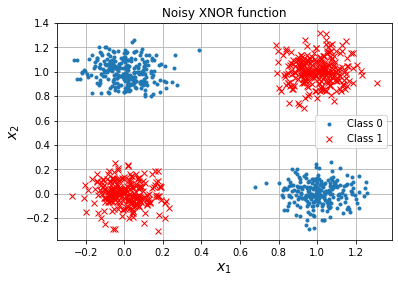

In [ ]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score

# Number of examples.
N = 1000

# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

# Create attributes.
x1 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)
x2 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)

# Target function (desired final output).
y = ~(x1 ^ x2)

# Labels of the first perceptron.
y1 = x1 | (~x2)

# Labels of the second perceptron.
y2 = (~x1) | x2

# Attributes and labels of the third perceptron.
X3 = np.c_[y1, y2]
y3 = y1 & y2

# Add noise to the attributes.
x1 = x1 + 0.1*np.random.randn(N,1)
x2 = x2 + 0.1*np.random.randn(N,1)

# Concatenate attributes.
X = np.c_[x1, x2]

# Plot the two classes.
idx0 = np.argwhere(y.ravel() == 0)
idx1 = np.argwhere(y.ravel() == 1)
plt.plot(x1[idx0.ravel()], x2[idx0.ravel()], '.', label='Class 0')
plt.plot(x1[idx1.ravel()], x2[idx1.ravel()], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Noisy XNOR function')
plt.legend()
plt.grid()
plt.show()

2. Divida a matriz de atributos $\textbf{X}$ e o vetor de rótulos $\textbf{y}_1$ em conjuntos de treinamento e validação para o treinamento do **primeiro perceptron**.

**DICAS**

+ Divida o conjunto total de amostras em 70% para treinamento e 30% para validação.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.

3. Treine o **primeiro perceptron** e imprima sua acurácia. Este perceptron deve implementar a seguinte expressão lógica
```python
y1 =  x1 | ~x2
```

**DICAS**

+ Por padrão, o parâmetro `fit_intercept` da classe `Perceptron` é igual a `True`. Portanto, não é necessário concatenar o vetor com valores iguais a 1 (atributo de bias) às matrizes de atributos de treinamento e validação. Desta forma, as matrizes de atributos de treinamento e validação seguirão o formato da equação do plano: $g(\textbf{x}) = \hat{a}_0 + \hat{a}_1x_1 + \hat{a}_2x_2$.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.

4. Divida a matriz de atributos $\textbf{X}$ e o vetor de rótulos $\textbf{y}_2$ em conjuntos de treinamento e validação para o treinamento do **segundo perceptron**.

**DICAS**

+ Divida o conjunto total de amostras em 70% para treinamento e 30% para validação.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.

5. Treine o **segundo perceptron** e imprima sua acurácia. Este perceptron deve implementar a seguinte expressão lógica
```python
y2 =  ~x1 | x2
```

**DICAS**

+ Por padrão, o parâmetro `fit_intercept` da classe `Perceptron` é igual a `True`. Portanto, não é necessário concatenar o vetor com valores iguais a 1 (atributo de bias) às matrizes de atributos de treinamento e validação. Desta forma, as matrizes de atributos de treinamento e validação seguirão o formato da equação do plano: $g(\textbf{x}) = \hat{a}_0 + \hat{a}_1x_1 + \hat{a}_2x_2$.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.

6. Divida a matriz de atributos $\textbf{X}_3$ e o vetor de rótulos $\textbf{y}_3$ em conjuntos de treinamento e validação para o treinamento do **terceiro perceptron**.

**DICAS**

+ Divida o conjunto total de amostras em 70% para treinamento e 30% para validação.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.

7. Treine o **terceiro perceptron** e imprima sua acurácia. Este perceptron deve implementar a seguinte expressão lógica
```python
y3 =  y1 & y2
```

**DICAS**

+ Por padrão, o parâmetro `fit_intercept` da classe `Perceptron` é igual a `True`. Portanto, não é necessário concatenar o vetor com valores iguais a 1 (atributo de bias) às matrizes de atributos de treinamento e validação. Desta forma, as matrizes de atributos de treinamento e validação seguirão o formato da equação do plano: $g(\textbf{x}) = \hat{a}_0 + \hat{a}_1x_1 + \hat{a}_2x_2$.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.

8. Usando a classe `Classifier`, definida abaixo, imprima a acurácia obtida através da combinação dos três perceptrons. Use o conjunto total de dados, ou seja, $\textbf{X}$ e $\textbf{y}$, para calcular a acurácia.

**DICAS**

+ Não se esqueça de executar a célula abaixo para definir a classe `Classifier` e poder utilizá-la.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
class Classifier():
    '''Classe que combina três perceptrons para realizar uma classificação não-linear.'''

    def __init__(self, per1, per2, per3):
        '''Construtor da classe.'''
        self.per1 = per1
        self.per2 = per2
        self.per3 = per3

    def predict(self, X):
        '''Realiza predições utilizando a combinação dos três perceptrons.'''
        y1 = self.per1.predict(X)
        y2 = self.per2.predict(X)
        X3 = np.c_[y1, y2]
        y3 = self.per3.predict(X3)
        return y3

In [ ]:
# Digite aqui o código do exercício.

9. Crie uma figura mostrando as regiões de decisão obtida com a combinação dos três perceptrons.

**DICAS**

+ A matriz de atributos criada para plotar as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação. Porém, lembre-se que, por padrão, o parâmetro `fit_intercept` da classe `Perceptron` é igual a `True`. Portanto, não é necessário concatenar o vetor com valores iguais a 1 (atributo de bias) às matrizes de atributos, basta criá-la com duas colunas, como mostrado no exemplo abaixo.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.

10. Plote a matriz de confusão obtida com a combinação dos três perceptrons. Use o conjunto total de dados, ou seja, $\textbf{X}$ e $\textbf{y}$, para plotar a matriz.

**DICAS**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/perceptron/perceptron_xor_problem.ipynb).

In [ ]:
# Digite aqui o código do exercício.